In [11]:
import pandas as pd
from decimal import Decimal
import io from StringIO
"""
Apply a function to each row of a DataFrame to create a new column

"""


def create_price_label(row):
    price = Decimal(row['price'])
    price = round(price, 2)
    return row['name'].title() + " $" + str(price)


fruit_price = r"""name,price
banana,2.5
grape,5.356
apple,4.99
"""

df = pd.read_csv(io.StringIO(fruit_price))
df['label'] = df.apply(create_price_label, axis=1)

print(df)

     name  price         label
0  banana  2.500  Banana $2.50
1   grape  5.356   Grape $5.36
2   apple  4.990   Apple $4.99


In [12]:
import pandas as pd

city = r"""city,state
sydney,nsw
brisbane,qld
perth,sa
"""

df = pd.read_csv(io.StringIO(city))

df['state'] = df['state'].apply(lambda x: x.upper())
df['city'] = df['city'].apply(lambda x: x.title())
print(df)

       city state
0    Sydney   NSW
1  Brisbane   QLD
2     Perth    SA


In [13]:
import pandas as pd

str_data = r"""
date,weather,city
2018-03-04,sunny,sydney
2018-03-05,nan,melbourne
2018-03-06,rain,perth
"""
df = pd.read_csv(io.StringIO(str_data))

print(df.isnull().any())
print(df['weather'].isnull().any())

df.iloc[1, 1] = 'cloudy'
assert not (df.isnull().any().any()), "No value should be missing"

date       False
weather     True
city       False
dtype: bool
True


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom

"""
https://en.wikipedia.org/wiki/Quantile

"""

# make data
str_data = r"""date,x,y
2016-12-31,0,2
2017-01-01,1,2
2017-01-02,2,2 
2017-01-03,3,2
2017-01-04,4,2
2017-01-05,5,2
2017-01-06,6,3
2017-01-07,7,3
2017-01-08,8,4
2017-01-09,9,4
"""
df = pd.read_csv(io.StringIO(str_data))
df.set_index(['date'], inplace=True)

df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)

df_copy = df.copy()

# replace - 1
print(df)
mask = (df['x'] > 0.0) & (df['x'] < 3.0)
df.loc[mask, 'x'] = -1
print(df)

# replace - 2
print(df_copy)
df_copy['x'] = np.where((df_copy['y'] == 3.0) | (df_copy['y'] == 4.0), np.nan, df_copy['x'])
print(df_copy)

              x    y
date                
2016-12-31  0.0  2.0
2017-01-01  1.0  2.0
2017-01-02  2.0  2.0
2017-01-03  3.0  2.0
2017-01-04  4.0  2.0
2017-01-05  5.0  2.0
2017-01-06  6.0  3.0
2017-01-07  7.0  3.0
2017-01-08  8.0  4.0
2017-01-09  9.0  4.0
              x    y
date                
2016-12-31  0.0  2.0
2017-01-01 -1.0  2.0
2017-01-02 -1.0  2.0
2017-01-03  3.0  2.0
2017-01-04  4.0  2.0
2017-01-05  5.0  2.0
2017-01-06  6.0  3.0
2017-01-07  7.0  3.0
2017-01-08  8.0  4.0
2017-01-09  9.0  4.0
              x    y
date                
2016-12-31  0.0  2.0
2017-01-01  1.0  2.0
2017-01-02  2.0  2.0
2017-01-03  3.0  2.0
2017-01-04  4.0  2.0
2017-01-05  5.0  2.0
2017-01-06  6.0  3.0
2017-01-07  7.0  3.0
2017-01-08  8.0  4.0
2017-01-09  9.0  4.0
              x    y
date                
2016-12-31  0.0  2.0
2017-01-01  1.0  2.0
2017-01-02  2.0  2.0
2017-01-03  3.0  2.0
2017-01-04  4.0  2.0
2017-01-05  5.0  2.0
2017-01-06  NaN  3.0
2017-01-07  NaN  3.0
2017-01-08  NaN  4.0
2017-01-09  N

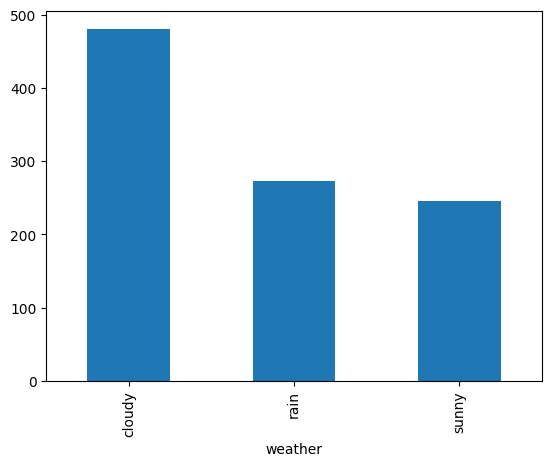

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.random.choice(['sunny', 'rain', 'cloudy'], 1000, p=[1 / 4.0, 1 / 4.0, 1 / 2.0])
df = pd.DataFrame(data=data, columns=['weather'])

df['weather'].value_counts().plot(kind='bar')
plt.show()

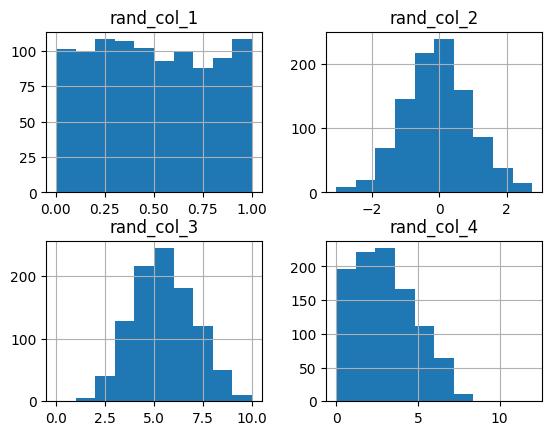

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()

N = 1000
df['rand_col_1'] = np.random.RandomState(0).uniform(0, 1, size=N)
df['rand_col_2'] = np.random.RandomState(0).normal(0, 1, size=N)
df['rand_col_3'] = np.random.RandomState(0).binomial(10, 0.5, size=N)
df['rand_col_4'] = np.random.RandomState(1).poisson(3, size=N)

df.hist(bins=10)
plt.show()

In [3]:
import pandas as pd
import numpy as np

# add some columns
df = pd.DataFrame(np.random.randint(0, 10, (4, 3)), columns=list(['A', 'B', 'C']))
df['D'] = df['A'] + df['C']

# add some columns
df = pd.DataFrame(np.random.randint(0, 10, (4, 3)), columns=list(['A', 'B', 'C']))
df['D'] = df[['A', 'C']].sum(axis=1)

# add all the columns
df = pd.DataFrame(np.random.randint(0, 10, (4, 3)), columns=list(['A', 'B', 'C']))
df['D'] = df[list(df.columns)].sum(axis=1)

# use lambda
df = pd.DataFrame(np.random.randint(0, 10, (4, 3)), columns=list(['A', 'B', 'C']))
df['D'] = df.apply(lambda x: x['A'] * 100 + x['B'] / 2, axis=1)
print(df)

   A  B  C      D
0  9  7  5  903.5
1  5  9  0  504.5
2  0  4  0    2.0
3  2  6  9  203.0


In [4]:
import pandas as pd

list_of_dicts = [
    {
        'date': '2018-03-04',
        'weather': 'cloudy'
    },
    {
        'date': '2018-03-05',
        'weather': 'sunny'
    },
    {
        'date': '2018-03-06'
    },
    {
        'date': '2018-03-07',
        'weather': 'rain'
    }
]
df = pd.DataFrame(list_of_dicts)
print(df)

         date weather
0  2018-03-04  cloudy
1  2018-03-05   sunny
2  2018-03-06     NaN
3  2018-03-07    rain


In [8]:
import pandas as pd
import io 
str_data = r"""
date, weather
2018-03-04, cloudy
2018-03-05, sunny
2018-03-06, rain
"""

df = pd.read_csv(io.StringIO(str_data))
print(df)

         date  weather
0  2018-03-04   cloudy
1  2018-03-05    sunny
2  2018-03-06     rain


In [6]:
import pandas as pd
from patsy.highlevel import dmatrix

"""
https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
https://www.youtube.com/watch?v=WRxHfnl-Pcs
"""

url = 'http://data.princeton.edu/wws509/datasets/salary.dat'
df = pd.read_table(url, delim_whitespace=True)
print(df.head())

# use pandas
dummy = pd.get_dummies(df['sx'])
print(dummy.head())

df = pd.concat([df, dummy], axis=1)
print(df.head())

# use patsy
dummy = dmatrix("sx", df, return_type='dataframe')
df = pd.concat([df, dummy], axis=1)
print(df.head())

C:\Users\Mañanas\AppData\Local\Temp\ipykernel_9360\1740707084.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(url, delim_whitespace=True)


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [5]:
import pandas as pd

fruit_price = r"""product,price
au-apple-1,2.5
au-apple-2,5.356
au-peach-1,4.99
au-peach-2,3.99
au-grape-2,3.99
"""

df = pd.read_csv(io.StringIO(fruit_price))
df['Is Apple'] = df['product'].apply(lambda x: 'Y' if 'apple' in x else 'N')

print(df)

      product  price Is Apple
0  au-apple-1  2.500        Y
1  au-apple-2  5.356        Y
2  au-peach-1  4.990        N
3  au-peach-2  3.990        N
4  au-grape-2  3.990        N


In [1]:
import pandas as pd
from patsy.highlevel import dmatrix

"""
https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
https://www.youtube.com/watch?v=WRxHfnl-Pcs
"""

url = 'http://data.princeton.edu/wws509/datasets/salary.dat'
df = pd.read_table(url, delim_whitespace=True)
print(df.head())

# use pandas
dummy = pd.get_dummies(df['sx'])
print(dummy.head())

df = pd.concat([df, dummy], axis=1)
print(df.head())

# use patsy
dummy = dmatrix("sx", df, return_type='dataframe')
df = pd.concat([df, dummy], axis=1)
print(df.head())

C:\Users\Mañanas\AppData\Local\Temp\ipykernel_13976\1740707084.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(url, delim_whitespace=True)


URLError: <urlopen error [Errno 11001] getaddrinfo failed>